# Capstone 1 – Part 1: Employee Attrition Analysis
Notebook by Sampada Kasture

# Dataset
Download the dataset as a CSV file from here.

# Context & Problem Statement
This fictional dataset contains up to 30 features, including categorical and discrete data. These features are a mix of numerical and text values and help analyze employee data throughout the lifecycle—from hiring to offboarding, including attrition events.

Employee attrition has long been a significant concern for organizations due to the substantial investments required in training new employees. The departure of an employee leads to several costs: hiring replacements, retraining, workflow disruptions, and reduced morale among remaining staff. Furthermore, attrition can erode trust and increase management challenges.

This HR Attrition dataset, though fictional, is structured to identify the key factors influencing employee retention and attrition. In this capstone, we will thoroughly analyze these features and apply predictive modeling techniques to better understand attrition patterns and make accurate predictions.

# Business Use Case
Provide a brief overview of attrition within the organization.
Explore the main factors that lead to employee attrition.
Identify relevant contributors to employee performance ratings and calculate their correlations.
# Goals / Metrics
Identify the top reasons behind attrition and recommend appropriate action steps.
Highlight the key factors driving employee performance.
TODO
You are required to use Python, along with Pandas, NumPy, Matplotlib, and other relevant libraries to accomplish the following tasks:

# 1. Data Retrieval (1 point)
Load the dataset from the source (CSV file).
Explore the dataset structure, features, and the target variable: Attrition.
Understand the context and importance of each feature in relation to employee attrition.
# 2. Data Preprocessing (2 points)
Clean the dataset by handling missing values, duplicates, and outliers.
Encode categorical variables and transform data types where necessary.
# 3. Feature Engineering & Exploratory Data Analysis (EDA) (3 points)
Create new variables (e.g., employee tenure, performance metrics).
Analyze factors contributing to attrition (e.g., age, job role, salary, work environment).
Visualize attrition rates across demographic and employment-related variables.
Identify patterns and correlations that drive attrition.
Include both 1-D and 2-D exploratory analysis for better understanding of the data.
# 4. Effective Communication (2 points)
Use Markdown cells to document your thought process:

Why each step was taken
What the insights were from each visualization
Ensure all plots are clearly labeled and easy to interpret.

Comment your code so it is understandable and review-ready.

# Grading & Important Instructions
All tasks are mandatory and should be completed sincerely.

Before submitting, ensure your code runs without errors.

You may use external resources (e.g., ChatGPT, StackOverflow), but cite your references in the notebook.

If stuck, attempt debugging via online sources. If unresolved, reach out for support.

Minimum score required: 7/10 A lower score will require resubmission.

Feedback types:

Awesome (well done)
Suggestion (optional improvement)
Required (must fix before resubmission)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Extracting the CSV file

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/sampada-kasture/HR_Employee_Attrition/refs/heads/main/CSV_File/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
#checking the size of the dataset
df.shape

(1470, 35)

In [27]:
#checking for null values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [28]:
#checking for the features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [29]:
#checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


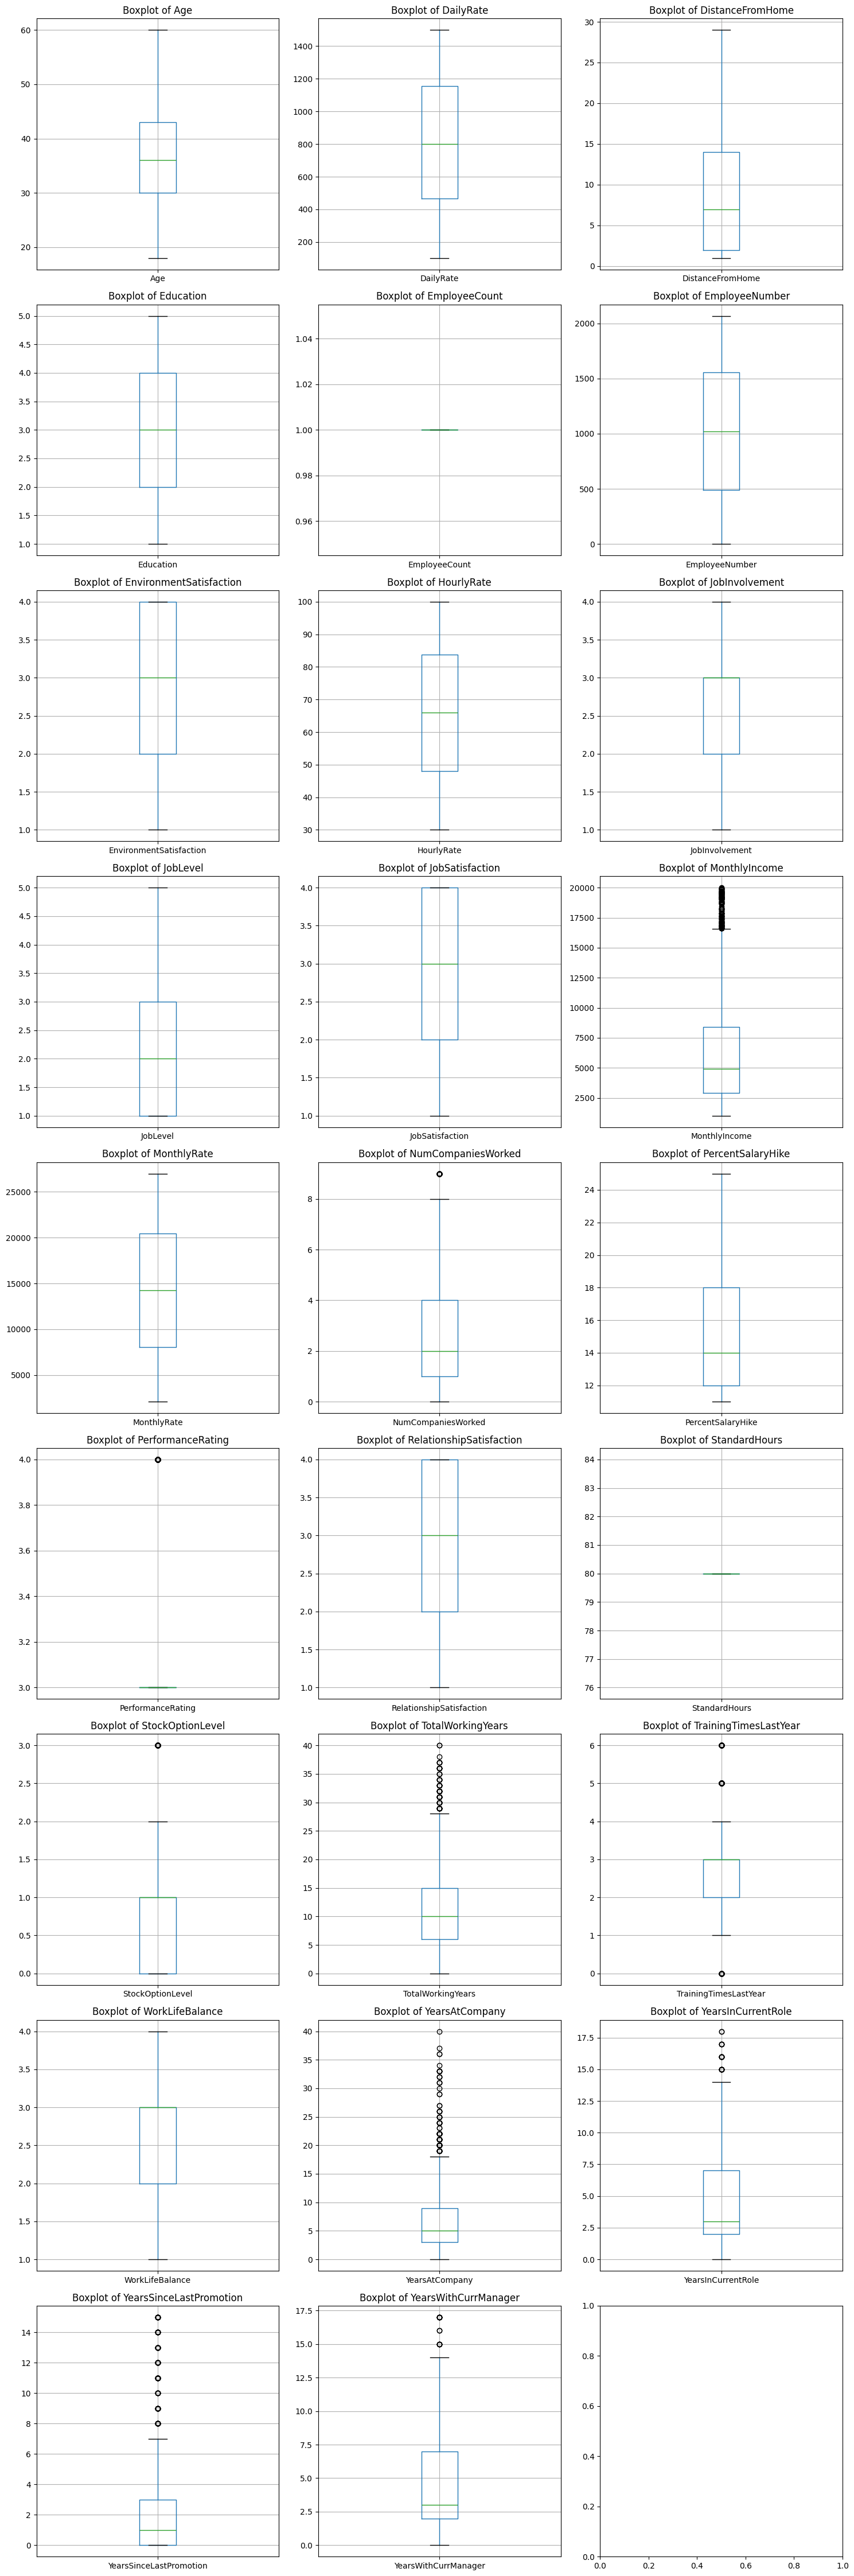

In [30]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Visualize outliers using boxplots
fig, axes = plt.subplots(nrows=len(numerical_cols)//3 + 1, ncols=3,
                        figsize=(15, 5*(len(numerical_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [31]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Check unique values in categorical columns
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())

# Encode binary variables
if 'Attrition' in df.columns:
    df['Attrition_Binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# For other categorical variables, you can use:
# - Label Encoding for ordinal data
# - One-hot encoding for nominal data


Attrition: 2 unique values
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel: 3 unique values
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department: 3 unique values
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField: 6 unique values
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Name: count, dtype: int64

Gender: 2 unique values
Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole: 9 unique values
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Name: count, dtype: int64

MaritalStatus: 3 unique values
MaritalStatus
Married     673
Single      470
Divorced    327
Name:

For Encoding binary coloumns, label encoding is used and for multiclass categorical values , one hot encoding is used.


In [52]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df
# Label Encoding for binary columns
label_enc_cols = ["Attrition", "Gender", "OverTime"]
le = LabelEncoder()
for col in label_enc_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot Encoding for multi-class categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=["BusinessTravel", "Department",
                                                 "EducationField", "JobRole",
                                                 "MaritalStatus"], drop_first=True)

# Final encoded dataframe shape
df_encoded.shape


(1470, 53)

# Feature Engineering
Creating new features


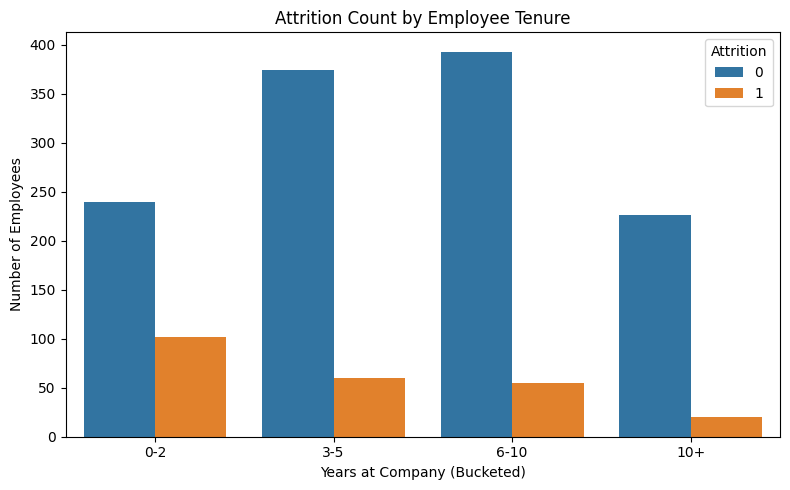

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering: Create new feature - tenure buckets
df_encoded['TenureBucket'] = pd.cut(df_encoded['YearsAtCompany'],
                                    bins=[-1, 2, 5, 10, 40],
                                    labels=['0-2', '3-5', '6-10', '10+'])

# Create a copy for EDA (merge with Attrition column for better visualization)
df_eda = df_encoded.copy()
df_eda['Attrition'] = df['Attrition']  # Add original label for easier plotting

# Plot 1: Attrition rate by Tenure Bucket
plt.figure(figsize=(8,5))
sns.countplot(x='TenureBucket', hue='Attrition', data=df_eda)
plt.title('Attrition Count by Employee Tenure')
plt.xlabel('Years at Company (Bucketed)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()


- Employees with 0–2 years at the company show higher attrition.

-
Employees with 10+ years have significantly lower attrition, indicating long-term retention.

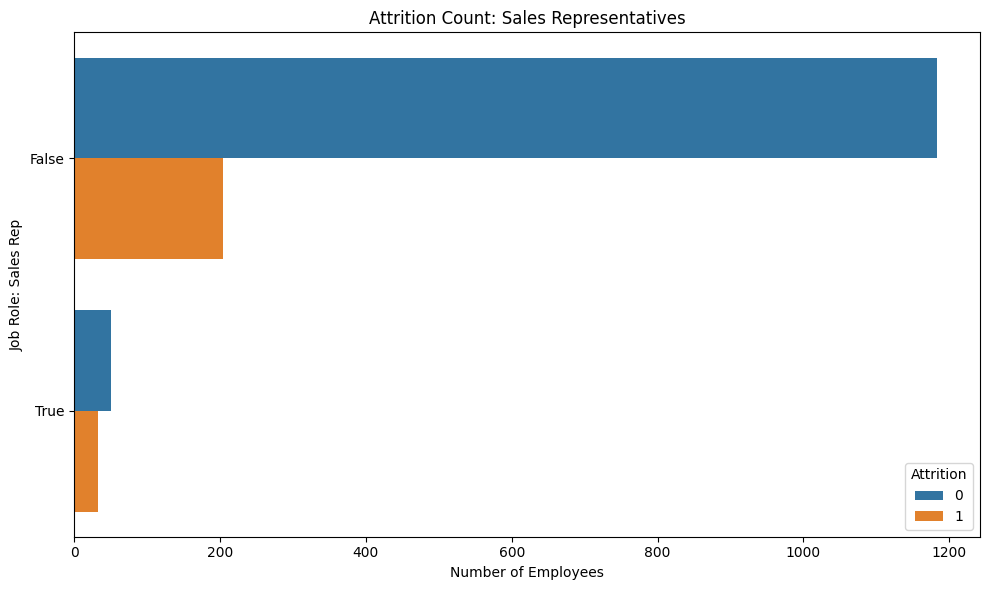

In [56]:
# 1.1 Attrition rate by Job Role
plt.figure(figsize=(10,6))
sns.countplot(y='JobRole_Sales Representative', hue='Attrition', data=df_eda)
plt.title('Attrition Count: Sales Representatives')
plt.xlabel('Number of Employees')
plt.ylabel('Job Role: Sales Rep')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()




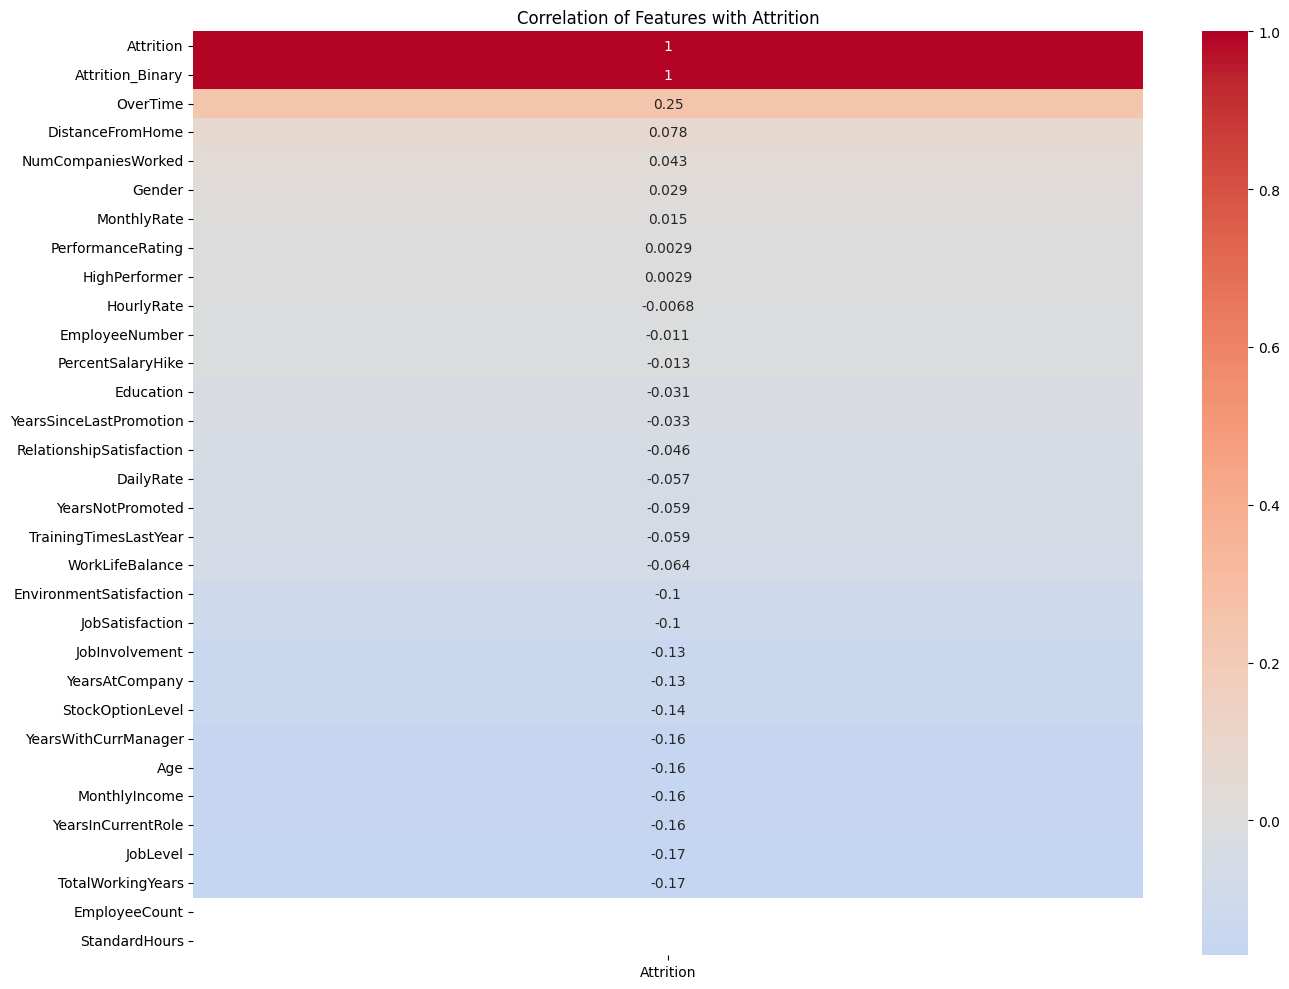

In [65]:
# Ensure only numeric columns are used for correlation
df_corr = df_encoded.select_dtypes(include='number')  # keep only numeric columns

# Compute correlation matrix
corr = df_corr.corr()

# Visualize correlation with Attrition
plt.figure(figsize=(14,10))
sns.heatmap(corr[['Attrition']].sort_values(by='Attrition', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Features with Attrition')
plt.tight_layout()
plt.show()



- Sales Representatives have a noticeably higher rate of attrition compared to other roles (even though they are a small group)
- OverTime: Strongest positive correlation with attrition. Employees working overtime are more likely to quit.

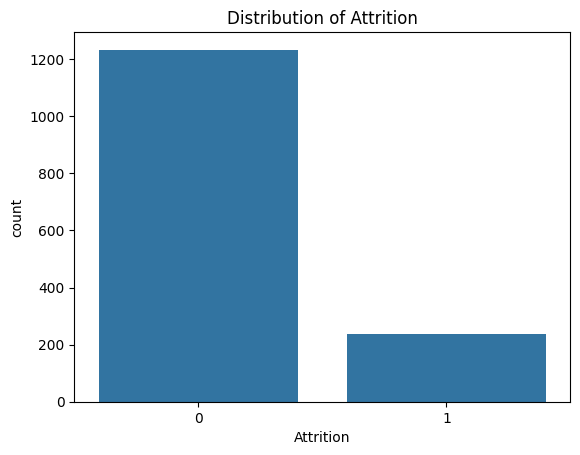

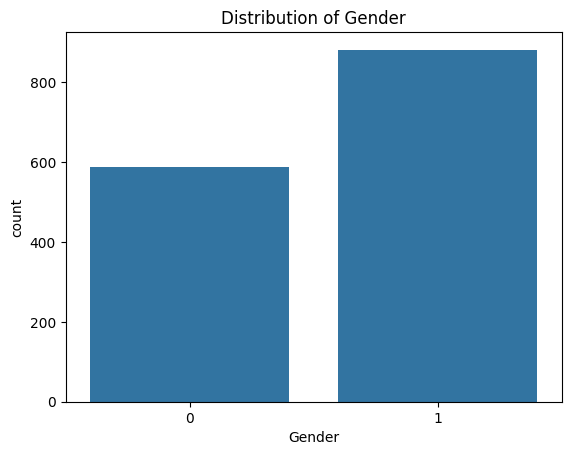

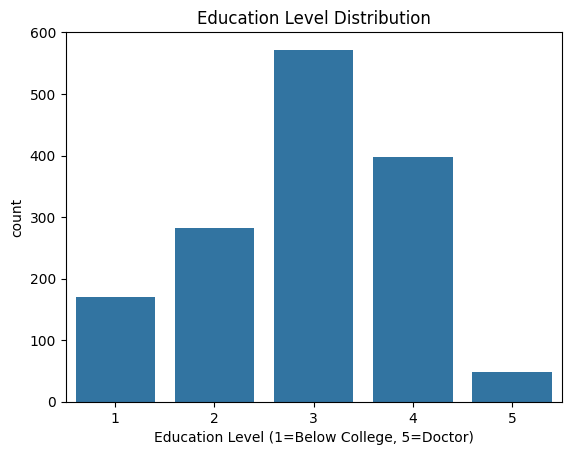

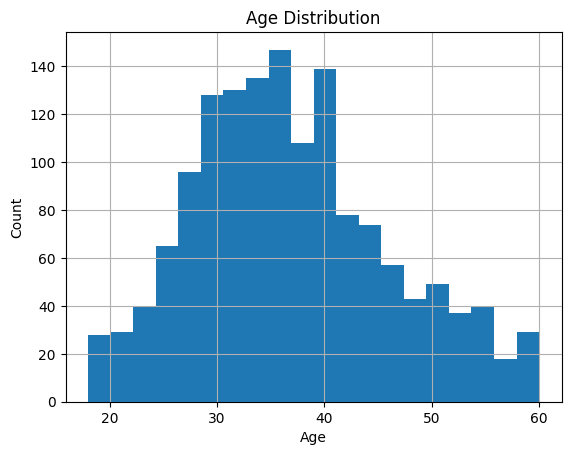

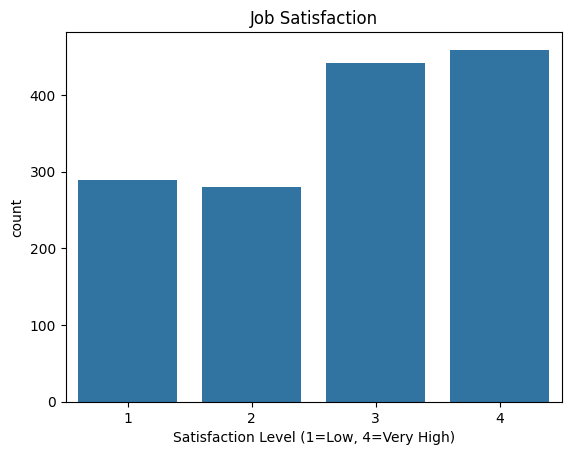

In [63]:
#1d analysis
#Value Counts and Distributions

import seaborn as sns
import matplotlib.pyplot as plt

# Attrition Distribution
sns.countplot(x='Attrition', data=df)
plt.title("Distribution of Attrition")
plt.show()

# Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.show()

# Education Level
sns.countplot(x='Education', data=df)
plt.title("Education Level Distribution")
plt.xlabel("Education Level (1=Below College, 5=Doctor)")
plt.show()

# Histogram for Age
df['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Job Satisfaction Levels
sns.countplot(x='JobSatisfaction', data=df)
plt.title("Job Satisfaction")
plt.xlabel("Satisfaction Level (1=Low, 4=Very High)")
plt.show()


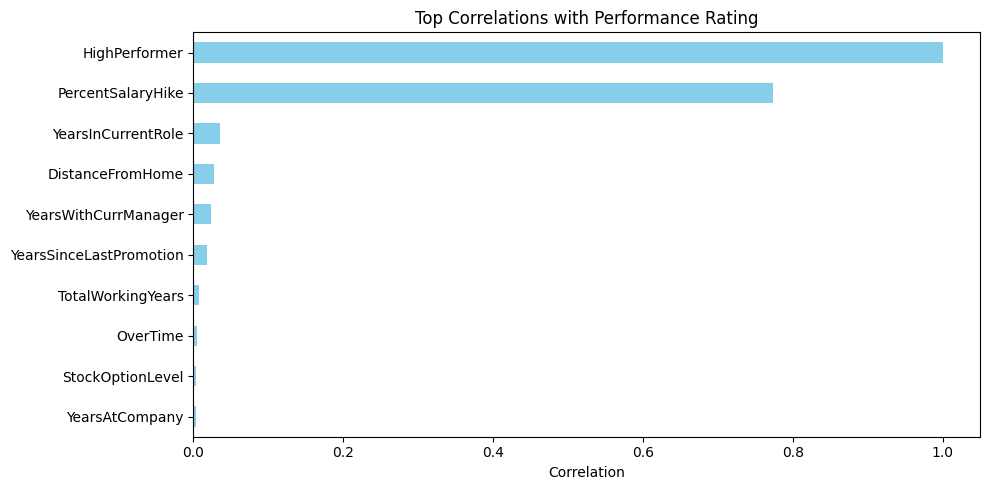

In [66]:
# Correlation with Performance Rating
performance_corr = df_corr.corr()['PerformanceRating'].sort_values(ascending=False)

# Visualize top correlations with PerformanceRating
top_perf_corr = performance_corr.drop('PerformanceRating').head(10)

plt.figure(figsize=(10,5))
top_perf_corr.plot(kind='barh', color='skyblue')
plt.title('Top Correlations with Performance Rating')
plt.xlabel('Correlation')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Conclusion :
- Overtime working employees are more likely to leave.
- Early stage candidates those between 0-2 years and expirienced with over 10 years are at risk.
- Low compensation significantly increases attrition risk.
- Certain roles like Sales Representatives have inherently higher turnover.

# Citations:
Referred ChatGPT and Claude, stackoverflow and geeksforgeeks.